In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Defining Problem (Problem Statement)

During the last of quarter in 2019 U.S. Cellular’s churn for the fourth quarter of 1.11% was higher than the year prior


- Churn in Telecomunication industry
    - source : https://www.fiercewireless.com/operators/q4-summary-t-mobile-revels-high-industry-wide-churn


### EDA Goals

- Findout what are factors the that might resulting in customer churn
- Findout how to maintain loyal customers (not churned customers)

In [8]:
df = pd.read_csv('seluler.csv')
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
print(df.shape)

(7043, 21)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### df.shape and df.head(), df.info() is used to get a general understanding of a dataset

## Descriptive Analysis, Handling Outliers and, Missing Value 

In [18]:
for column in df.columns:
    print(column, ":")
    print(df[column].unique())
    print("")
    
## getting all the unique column information for each column and try to understand what each column mean

customerID :
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

gender :
['Female' 'Male']

SeniorCitizen :
[0 1]

Partner :
['Yes' 'No']

Dependents :
['No' 'Yes']

tenure :
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService :
['No' 'Yes']

MultipleLines :
['No phone service' 'No' 'Yes']

InternetService :
['DSL' 'Fiber optic' 'No']

OnlineSecurity :
['No' 'Yes' 'No internet service']

OnlineBackup :
['Yes' 'No' 'No internet service']

DeviceProtection :
['No' 'Yes' 'No internet service']

TechSupport :
['No' 'Yes' 'No internet service']

StreamingTV :
['No' 'Yes' 'No internet service']

StreamingMovies :
['No' 'Yes' 'No internet service']

Contract :
['Month-to-month' 'One year' 'Two year']

PaperlessBilling :
['Yes' 'No']

PaymentMethod :
['Electronic check' 'Maile

In [22]:
df.describe().T

# describing all the general statistic of the numerical columns
# the median of tenure is 29 months while the average is 32 month
# the average of monthly charges of all customer is 64.76
#

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [24]:
df.describe().columns

# we are going to loop all of this columns and make a looping to draw a box plot to see the outliers


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [30]:
df.describe(include = "O")

# from this describe table we can see that 5174 is a retained customer while 1869 customer is a churn customer
# this means almost 27% customer churned (we might need to subset and do a deeper analysis on churned customer)
# the most popular contract is also month to month contract this might be the cause of the churn since it offer so much flexibility

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,0015-UOCOJ,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [40]:
df[df['tenure'] == 0]

# this is just to check all the new customers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [45]:
df.corr().T

# from the correlation table we can see there's no negative correlation 
# There's a slight positive correlation and we will do a deeper analysis between this column

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


## Handling Outliers

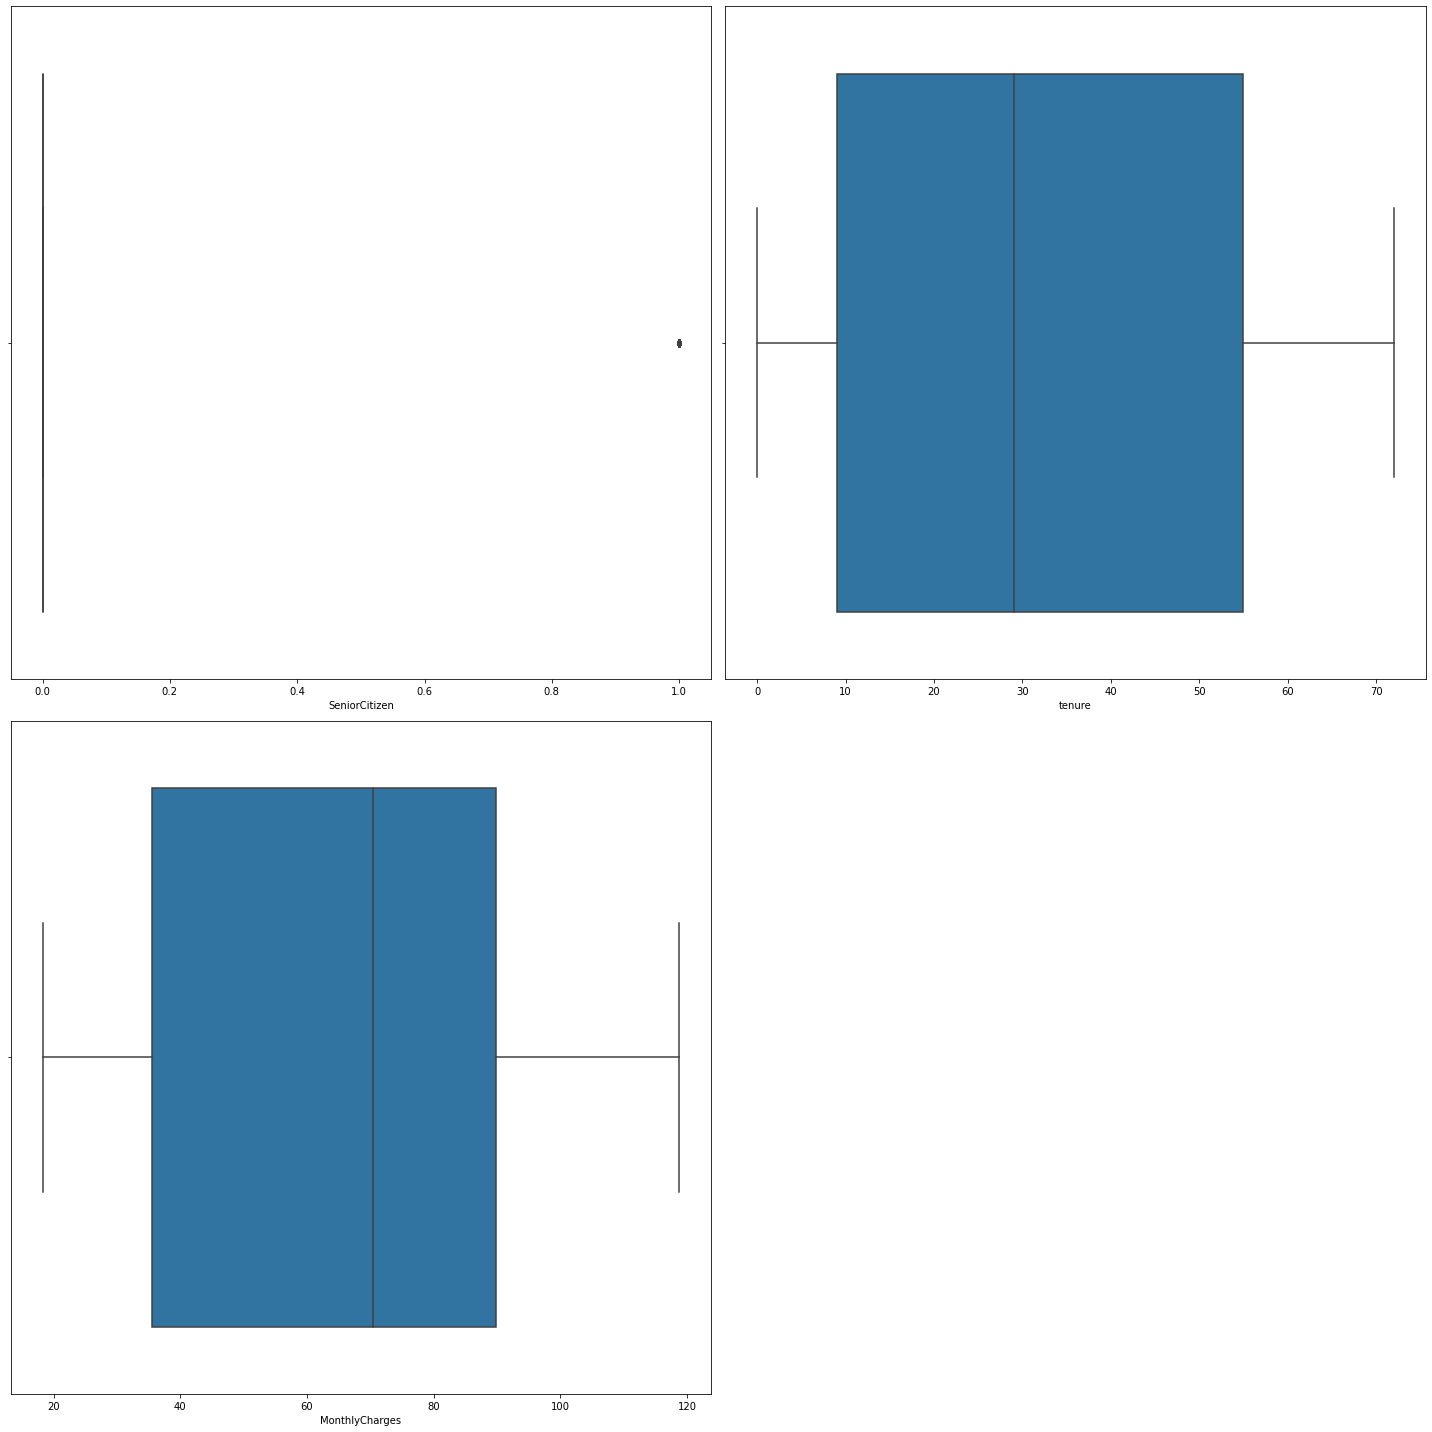

In [26]:
plt.figure(figsize = (20, 20))

x = 1

for column in df.describe().columns:
    plt.subplot(2, 2, x)
    sns.boxplot(df[column])
    x += 1
    plt.tight_layout()
    
# from this table below we can see there is no outliers for all the numerical category in the columns
# for the Senior citizen because the column only have value 0, 1, the 1 represent of senior citizen so
# we are going to ignore the outlier here

### Missing Values


In [41]:
df.isna().sum()

# apperently there is no missing value in the data so we are not going to drop anything or fill anything for now

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Preparation

In [48]:
df_churn = df[df['Churn'] == "Yes"]
df_not_churn = df[df['Churn'] == "No"]

# Subsetting the data frame of customer who's churn and customer who's not churn
# this subsetting might be useful to extract more information on what lead the customer to remain loyal
# and what might be the causes of customer to churn

In [49]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes


In [50]:
df_not_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


## EDA

### Univariate

In [52]:
print('Churn Ratio')

print("")
print(df['Churn'].value_counts())
print('-' * 50)
print(round(df['Churn'].value_counts(normalize = True),2))

# As i mentioned before above, that 27 % customer churn to another provider while another 73 stays loyal
# Comparing this and the article news in https://www.fiercewireless.com/operators/q4-summary-t-mobile-revels-high-industry-wide-churn
# the article mention that majority of us cell provider has lower than 3% churn ratio, this 27% churn ratio is huge
# and we will deep diver to know what might lead into high churn

Churn Ratio

No     5174
Yes    1869
Name: Churn, dtype: int64
--------------------------------------------------
No     0.73
Yes    0.27
Name: Churn, dtype: float64


In [57]:
print('Loyal Customer Tenure')

print("")
print(df_not_churn['tenure'].value_counts().head(10))
print('-' * 50)
print(round(df_not_churn['tenure'].value_counts(normalize = True).head(10),2))

# For Loyal customer majority of them has become customer for more than one year and stays with the provider

Loyal Customer Tenure

72    356
1     233
71    164
2     115
70    108
3     106
4      93
68     91
67     88
69     87
Name: tenure, dtype: int64
--------------------------------------------------
72    0.07
1     0.05
71    0.03
2     0.02
70    0.02
3     0.02
4     0.02
68    0.02
67    0.02
69    0.02
Name: tenure, dtype: float64


In [64]:
print('Churned Customer Tenure')

print("")
print(df_churn['tenure'].value_counts().head(10))
print('-' * 50)
print(round(df_churn['tenure'].value_counts(normalize = True).head(10),2))
print('-' * 50)
print("customer who has less than one year tenure make ",round(df_churn['tenure'].value_counts(normalize = True).head(10),2).sum() * 100, "percent of total churned customers")

# for Churned Customer the highest percentage of churn happend after they become a customer for one month then the customer
# move to another provider



Churned Customer Tenure

1     380
2     123
3      94
4      83
5      64
7      51
9      46
10     45
8      42
6      40
Name: tenure, dtype: int64
--------------------------------------------------
1     0.20
2     0.07
3     0.05
4     0.04
5     0.03
7     0.03
9     0.02
10    0.02
8     0.02
6     0.02
Name: tenure, dtype: float64
--------------------------------------------------
customer who has less than one year tenure make  50.0 percent of total churned customers


In [74]:
# Contract
print("Contract")
print("")
print(df['Contract'].value_counts())
print("")
print(print(round(df['Contract'].value_counts(normalize = True),2)))

# Based on this dataset Month to month contract is the most popular contract more than half of the customer use month to month contract
# This month to month contract might have a correlation on why half of the churned customer has less than one year tenure


Contract

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Month-to-month    0.55
Two year          0.24
One year          0.21
Name: Contract, dtype: float64
None


In [66]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### MultiVariate Analysis

### Churn and Gender

In [69]:
pd.crosstab(index = df['gender'], columns = df['Churn'], normalize = 'index').round(2)

# This means that gender almost has no implication on churn since the number is almost similar

Churn,No,Yes
gender,,
Female,0.73,0.27
Male,0.74,0.26


### Churn and Tenure

In [83]:
pd.crosstab(index = df['Churn'], columns = df['tenure'], normalize = 'index').round(2)

# Most Churned customer move to another provider after one month of using "this" company provider


tenure,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,0.0,0.05,0.02,0.02,0.02,0.01,0.01,0.02,0.02,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.02,0.03,0.07
Yes,0.0,0.20,0.07,0.05,0.04,0.03,0.02,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00


### Churn and Contract Type

In [86]:
pd.crosstab(index = df['Contract'], columns = df['Churn'], normalize = 'columns').round(2)

# This proved that month month contract has the highest Churn ratio compared to other types of contract
# the longer the contract the lower the churn ratio
# More Benefits for people who sign up for one year plan / two year plan

Churn,No,Yes
Contract,,
Month-to-month,0.43,0.89
One year,0.25,0.09
Two year,0.32,0.03


### Senior Citizen and Churn

In [90]:
pd.crosstab(index = df['Churn'], columns = df['SeniorCitizen'], normalize = 'columns').round(2)

# 0 means not senior citizen and 1 means senior citizen
# Senior citizen has higher churn ratio compared to non senior citizen

SeniorCitizen,0,1
Churn,,
No,0.76,0.58
Yes,0.24,0.42


### Visualizing the Data

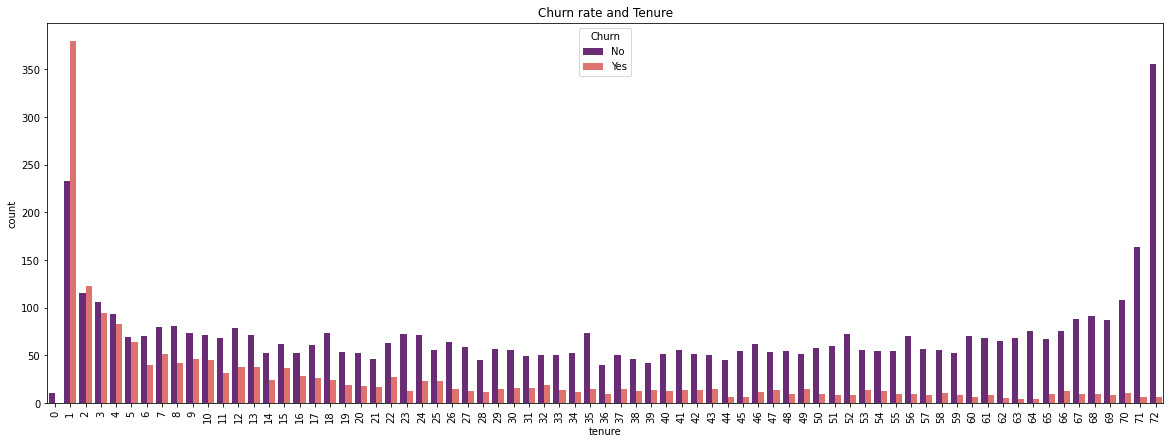

In [106]:
plt.figure(figsize = (20, 7))
tenure_chart = sns.countplot(x = 'tenure', data = df, hue = "Churn", palette = 'magma')
tenure_chart.set_xticklabels(
    tenure_chart.get_xticklabels(), 
    rotation=90)
plt.title('Churn rate and Tenure')
plt.show()

# the first month and the second month of tenure where churn number is higher compared to the loyal customer
# Suggestion : Customer Care should take an extra step to check in with the newer customer

Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

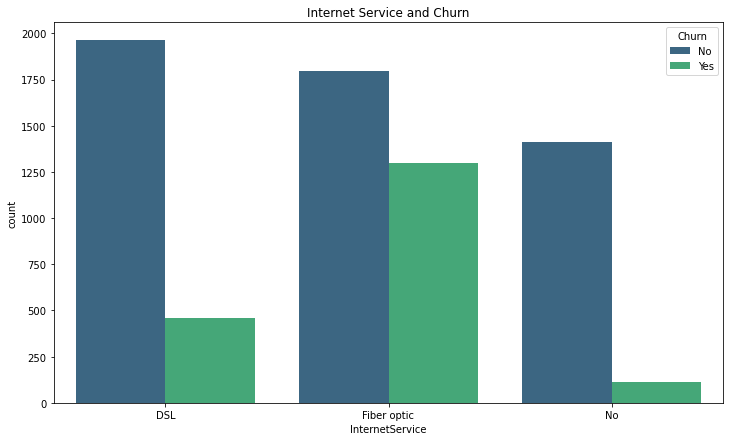

In [113]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'InternetService', data = df , hue = 'Churn', palette = 'viridis')
plt.title('Internet Service and Churn')
plt.show()

#Comparing Each of internet Services and churn ratio

# Among All the customers that uses internet service, Fiber optic internet service has the highest cancellation rate among all the internet service
# this needs further investigation 

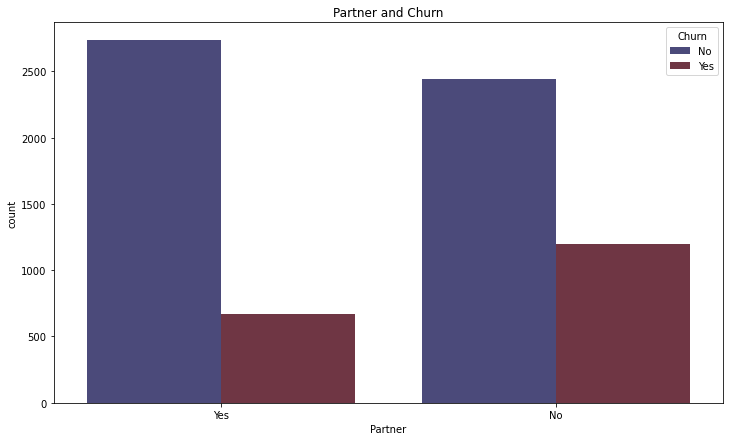

In [116]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'Partner', data = df , hue = 'Churn', palette = 'icefire')
plt.title('Partner and Churn')
plt.show()

# Customer that has a celuller plan with their partner has less tendencies to churn compared to customers that has a plan for himself/ herself
# Suggestion : this Celluler company could rollout a partner plan that has more benefits compared to singular plan
# since the partner plan has less tendencies to cancel

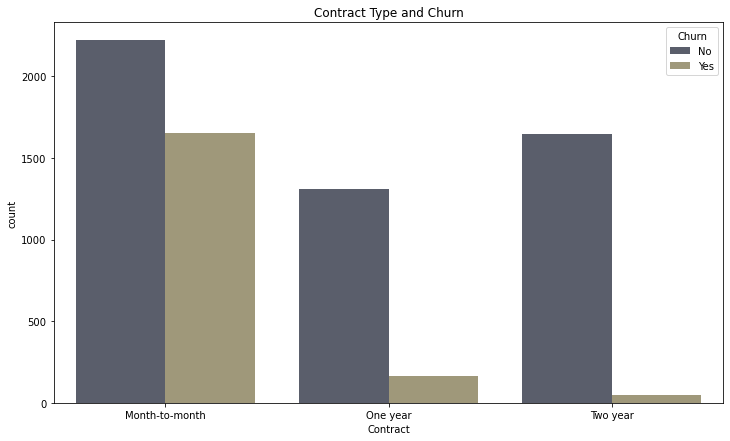

In [122]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'Contract', data = df , hue = 'Churn', palette = 'cividis')
plt.title('Contract Type and Churn')
plt.show()

#The visualization of each contract type and Churn Rate
# Month to Month has the highest Churn Rate
# The Longer the contract the lower the Churn Rate


## Insight

- month month contract has the highest Churn ratio compared to other types of contract
-  the longer the contract the lower the churn ratio
-  the first month and the second month of tenure were the only months where churn number is higher compared to the loyal customer
- The Churn rate for this cellular company is 27%
- Cutomer Who Enrolled in Partner Plan has lower Churn Ratio Compared to Customer who enrolled in singular plan
- Senior Citizen has a higher Churn rate Compared to other customers
- Customer who has fibre optic internet service has the highest churn rate compared to other internet service


### Conclusion and Recommendation 

- More Benefits to Customer who enrolled to one year contract or more, because the flexibility that offered by the month month contract it lead into the highest churn rate among all the contract. While the longer the contract the lower the churn rate, by giving more benefits / cheaper price to customers who wants to enrolled in the longer contract this will move customer to longer contract instead of month to month and will result in lower churn rate
<br>
- Customer Care should give more attention or implementing more CRM tools  of the first month and the second month tenure customers since the first 2 month tenure has the highest churn rate extra care should be given to the customer in their first second month of tenure
- The Fibre Optic Internet Need a further investigation on why it has incredibly high churn rate compared to other internet services
- Cheaper Price for 2 or more, this means people who enrolled with a partner will get a cheaper price, since people who have plan with their partner has less tendencies to churn